In [18]:
from qiskit import QuantumCircuit

# Drawing Quantum Circuits

## Text

In [19]:
# Circuit 1
# This is a single qubit circuit
# HZH is equivalent to X gate
# so the overall circuit matrix is X gate
# output: 100% |1>

qc1 = QuantumCircuit(1,1)
qc1.h(0)
qc1.z(0)
qc1.h(0)
qc1.draw(output='text')

┌───┐┌───┐┌───┐
  q: ┤ H ├┤ Z ├┤ H ├
     └───┘└───┘└───┘
c: 1/═══════════════

In [20]:
# matrix of circuit operation
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex
gate = Operator(qc1)
array_to_latex(gate.data)

<IPython.core.display.Latex object>

In [21]:
# output state
from qiskit import BasicAer, execute
job1= execute(qc1, BasicAer.get_backend('statevector_simulator'))

output = job1.result().get_statevector()
array_to_latex(output)

<IPython.core.display.Latex object>

## mpl

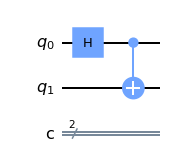

In [22]:
# Circuit 2
# This is a 2 qubit circuit
# It creates an entangled bell state
# output: 50% |00> and 50% |11>

qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.cx(0,1)
qc2.draw(output='mpl')

In [23]:
# Circuit 3
# output state
from qiskit import BasicAer, execute
job2 = execute(qc2, BasicAer.get_backend('statevector_simulator'))

output = job2.result().get_statevector()
array_to_latex(output)

<IPython.core.display.Latex object>

## Latex

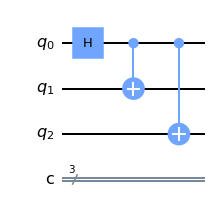

In [24]:
# This is a 3 qubit circuit
# It creates an entangled bell state know as GHZ:Greenberger–Horne–Zeilinger
# 50% |000> and 50% |111>

qc3 = QuantumCircuit(3, 3)
qc3.h(0)
qc3.cx(0, 1)
qc3.cx(0, 2)
qc3.draw('mpl')
#qc3.draw('latex')

In [25]:
# output state
from qiskit import BasicAer, execute
job3 = execute(qc3, BasicAer.get_backend('statevector_simulator'))

output = job3.result().get_statevector()
array_to_latex(output)

<IPython.core.display.Latex object>

# Visualisations

## Histograms
### Plots the probability of measuring |0> and |1>, the eigenstates of z basis 

#### In circuit 1, X gate is applied on a single qubit . The default initial state in qiskit is |0>, therefore X gate flips it to |1> state on every application. Therefore |1> has a probability of 100%

{'1': 1024}


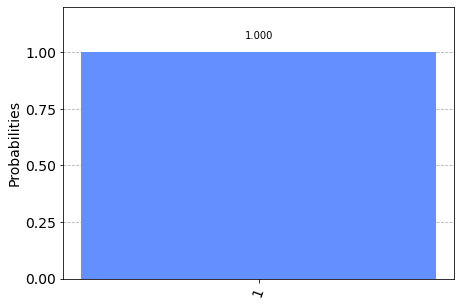

In [26]:
from qiskit.visualization import plot_histogram 
# histogram can be plotted post measurement only
qc1.measure(range(1), range(1)) 
# by default this is executed 1024 times, to measure the Probability
job1 = execute(qc1, BasicAer.get_backend('qasm_simulator')) 
print(job1.result().get_counts())
plot_histogram(job1.result().get_counts())

#### In circuit 2, entangled bell state  of 2 qubits is created. The possible measurable state in case of 2 qubits are: |00>, |01>, |10> and |11>. In this case, we get 50% Probability of |00> and 50% Probability of |11>

{'00': 520, '11': 504}


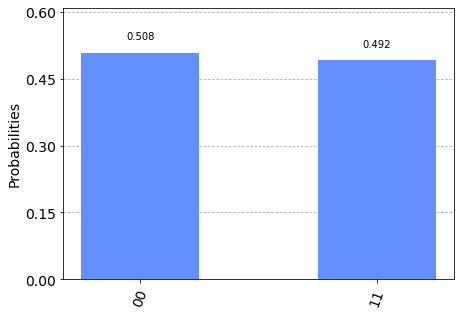

In [27]:
qc2.measure(range(2), range(2))
job2 = execute(qc2, BasicAer.get_backend('qasm_simulator'))
print(job2.result().get_counts())
plot_histogram(job2.result().get_counts())

#### In circuit 3, 3 qubit entangled state is created with 50% probability of measuring |000> and 50% probability of measuring |111>, out of the 8 possible outcomes. 

{'111': 547, '000': 477}


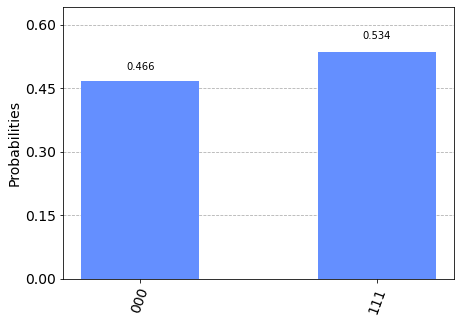

In [28]:
qc3.measure(range(3), range(3))
job3 = execute(qc3, BasicAer.get_backend('qasm_simulator'))
print(job3.result().get_counts())
plot_histogram(job3.result().get_counts())

## Bloch Multivector
### Plots the bloch sphere for any given statevector. It takes statevector as an input to plot the sphere

#### In circuit 1, the output statevector is |1>, which is plotted on the bloch sphere

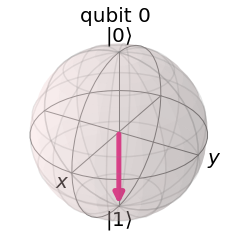

In [29]:
from qiskit.visualization import plot_bloch_multivector
result1 = execute(qc1, BasicAer.get_backend('statevector_simulator')).result()
plot_bloch_multivector(result1.get_statevector())

#### In circuit 2, the possible output statevectors are |00> and |11>. But on measuring we will get either of the 2, not both. You can re-run the cell multiple times to see the output statevector oscillate between these 2 states. As the cicruit comprises of 2 qubits, therefore 2 bloch spheres will be plotted marking each qubit.

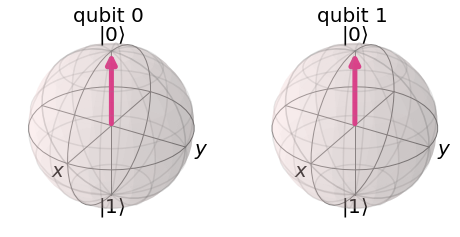

In [30]:
result2 = execute(qc2, BasicAer.get_backend('statevector_simulator')).result()
plot_bloch_multivector(result2.get_statevector())

#### In circuit 3, the possible output statevectors are |000> and |111>. But on measuring we will get either of the 2, not both. You can re-run the cell multiple times to see the output statevector oscillate between these 2 states. As the cicruit comprises of 3 qubits, therefore 3 bloch spheres will be plotted marking each qubit.

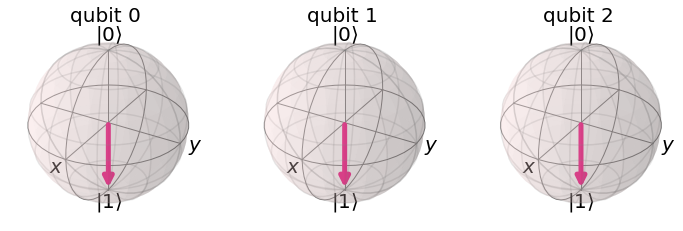

In [31]:
result3 = execute(qc3, BasicAer.get_backend('statevector_simulator')).result()
plot_bloch_multivector(result3.get_statevector())

## Bloch Vector
### Plots the bloch sphere for any given state. It takes input in form of coordinates. The default setting of the coordinates is cartesian, but it can also be specified otherwise, to be spherical

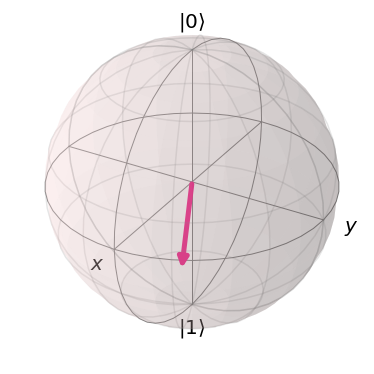

In [32]:
from qiskit.visualization import plot_bloch_vector
# default cartesian
plot_bloch_vector([1,1/2,0])

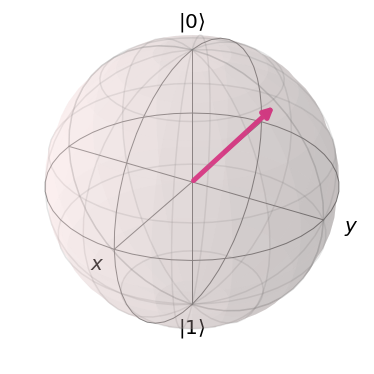

In [33]:
from qiskit.visualization import plot_bloch_vector
from math import pi
# using spherical coordinates
# [Theta, Phi, Radius]
plot_bloch_vector([pi/2,pi/4,1], coord_type='spherical')

## Qsphere
### Plots the global representation of a quantum state of multiple qubits. The size of the points is proportional to the probability of the corresponding term in the state and the color represents the phase.

#### Circuit 1 is single qubit based, so the qsphere represents a single qubit, but because this is a single qubit doesn't mean that the bloch sphere and qsphere are the same

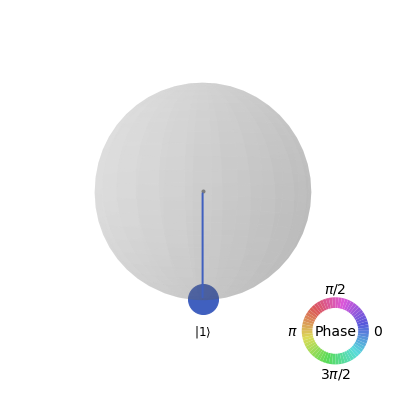

In [34]:
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector

result1 = execute(qc1, BasicAer.get_backend('statevector_simulator')).result()
plot_state_qsphere(result1.get_statevector())

#### Circuit 2 is based on 2 qubits, and the qsphere changes accordingly to represent the output state as |00> or |11>

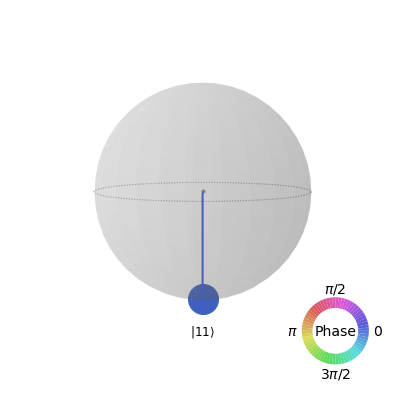

In [35]:
result2 = execute(qc2, BasicAer.get_backend('statevector_simulator')).result()
plot_state_qsphere(result2.get_statevector())

#### All possible states in case of 2 qubits shown on the qsphere

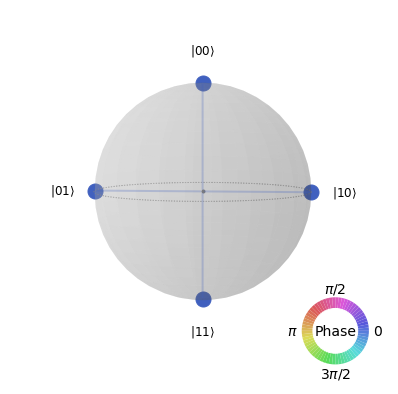

In [36]:
# they are all in the same phase, as they all are colored blue.
qc = QuantumCircuit(2)
qc.h([0,1])

# Retrieve a state vector.
sv = Statevector.from_label('00') # or .from_int(0, 2**2)
sv.evolve(qc).draw('qsphere')

#### All possible states in case of 2 qubits shown on the qsphere with different phases

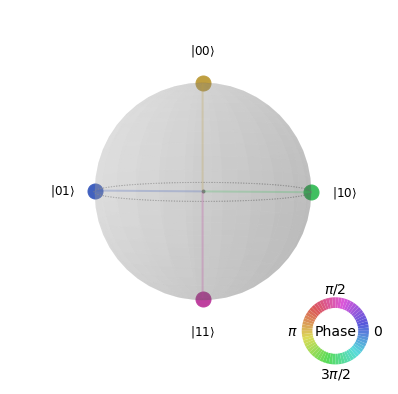

In [37]:
# The circuit is similar to the one shown above.
# All the states are put in different phases, by the application of phase gates like z,s,t,p

qc = QuantumCircuit(2)
qc.h([0,1])
qc.z(0)
qc.s(1)
# Retrieve a state vector.
sv = Statevector.from_int(0, 2**2)
sv.evolve(qc).draw('qsphere')

#### Circuit 3 is based on 3 qubits, and the qsphere changes accordingly to represent the output state of either |000> or |111>

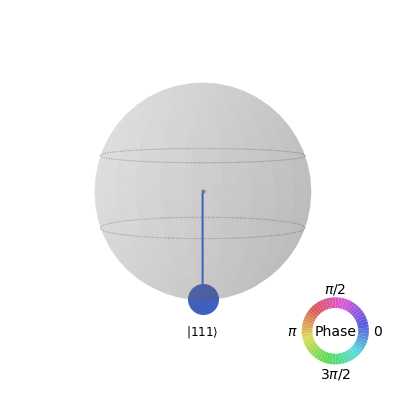

In [38]:
result3 = execute(qc3, BasicAer.get_backend('statevector_simulator')).result()
plot_state_qsphere(result3.get_statevector())

#### All possible states in case of 3 qubits shown on the qsphere

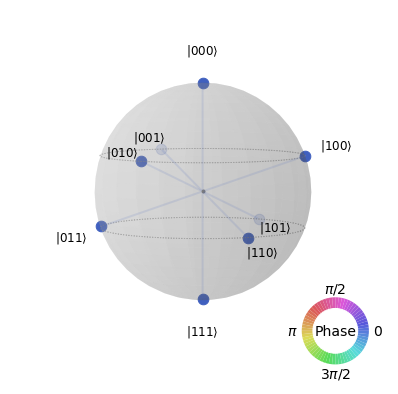

In [39]:
qc = QuantumCircuit(3)
qc.h([0,1,2])

# Retrieve a state vector.
sv = Statevector.from_label('000') # or .from_int(0, 2**3)
sv.evolve(qc).draw('qsphere')

#### All possible states in case of 3 qubits shown on the qsphere with different phase

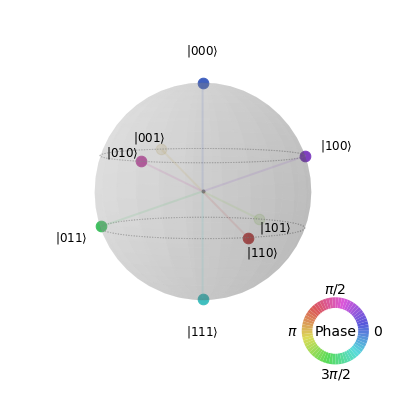

In [40]:
# The circuit is similar to the one shown above.
# All the states are put in different phases, by the application of phase gates like z,s,t,p

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.z(0)
qc.s(1)
qc.t(2)

# Retrieve a state vector.
sv = Statevector.from_int(0, 2**3)
sv.evolve(qc).draw('qsphere')

## Hinton
### Hinton diagrams are useful for visualizing the values of a 2D array
#### 1. Size of the box represents magnitude
#### 2. Positive values are represented by white squares
#### 3. Negative values are represented by black squares

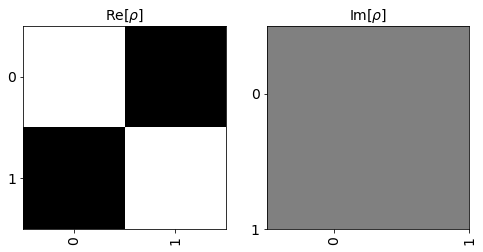

In [41]:
from qiskit.visualization import plot_state_hinton
%matplotlib inline
plot_state_hinton([1,-1])

# white means positive
# black means negative
# grey means zero

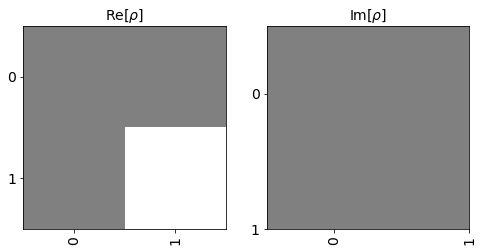

In [42]:
# circuit 1 after measurement is |1>, therefore the hinton
plot_state_hinton(result1.get_statevector())

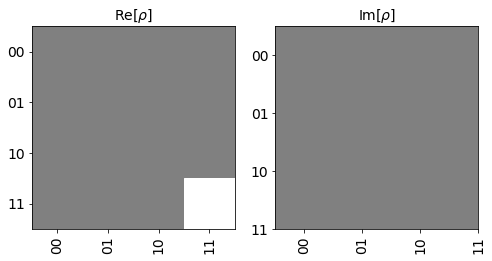

In [43]:
# circuit 2's hinton after measurement
plot_state_hinton(result2.get_statevector())

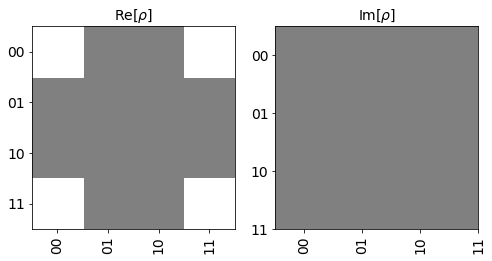

In [44]:
# same circuit's hinton before measurement
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

output = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_hinton(output)

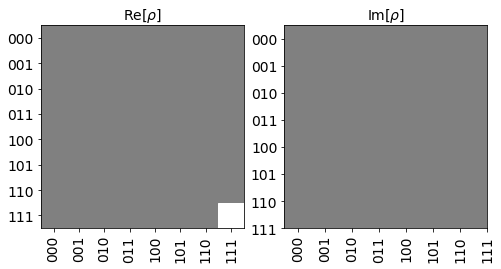

In [45]:
# circuit 3's hinton after measurement
plot_state_hinton(result3.get_statevector())

## City
### Plot the cityscape of quantum state.
### Similar to hinton, plots two 3d bar graphs (two dimensional) of the real and imaginary part of the density matrix given.

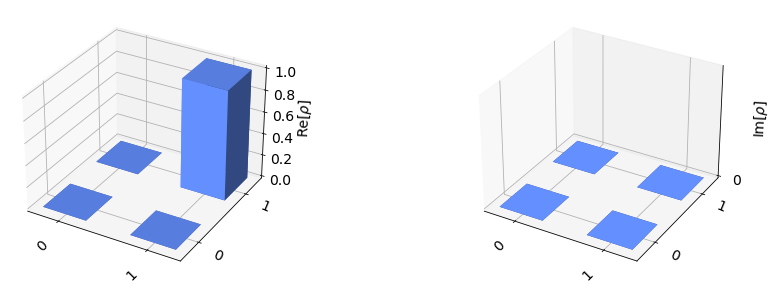

In [46]:
# for circuit 1, after measurement
from qiskit.visualization import plot_state_city
plot_state_city(result1.get_statevector())

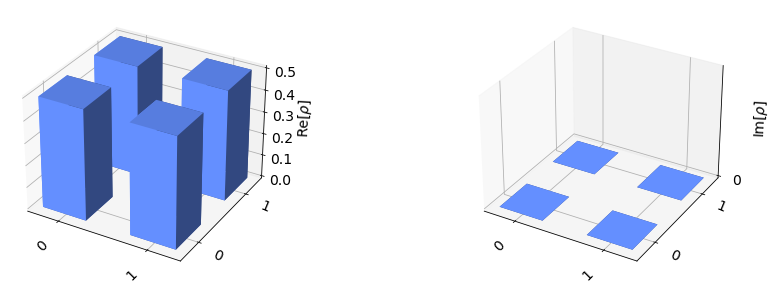

In [47]:
# for state |+>
from math import sqrt
plot_state_city([1/sqrt(2), 1/sqrt(2)])

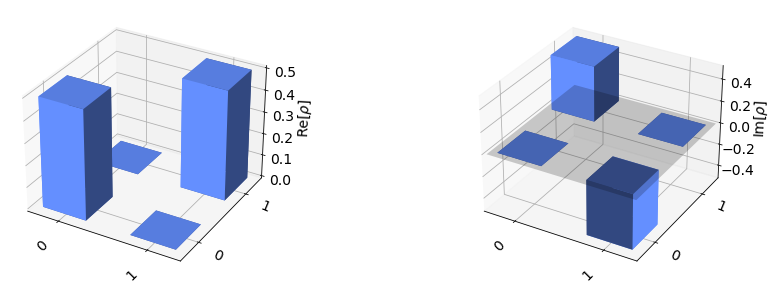

In [48]:
# for state |+i>
from math import sqrt
plot_state_city([1/sqrt(2), 1.j/sqrt(2)])

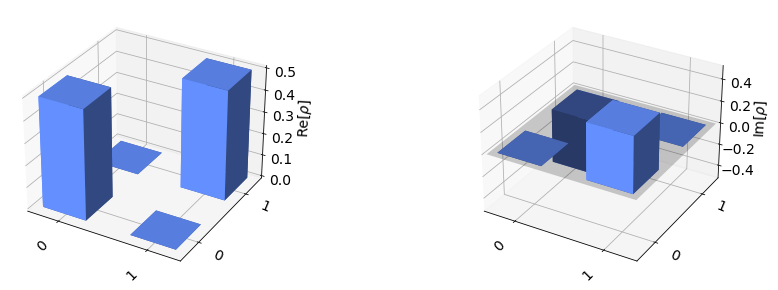

In [49]:
# for state |-i>
from math import sqrt
plot_state_city([1/sqrt(2), -1.j/sqrt(2)])

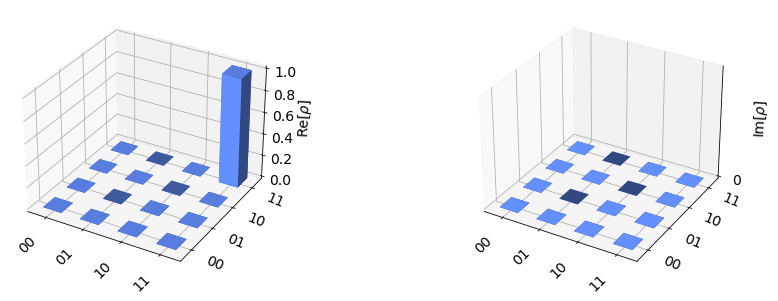

In [50]:
# for circuit 2, after measurement
plot_state_city(result2.get_statevector())

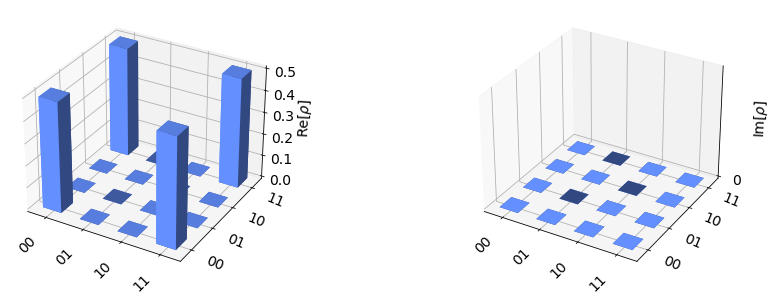

In [51]:
# for circuit 2, before measurement
output = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_city(output)

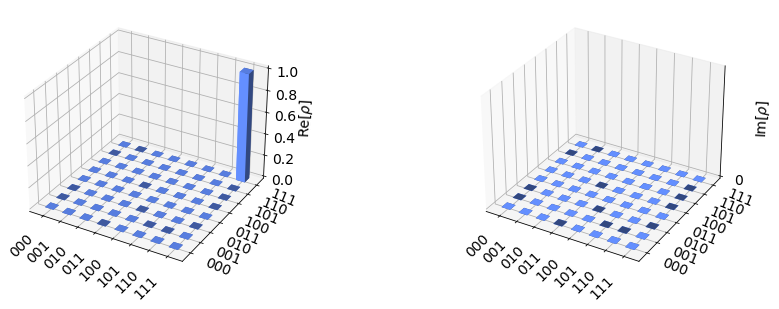

In [52]:
# circuit 3, after measurement
plot_state_city(result3.get_statevector())

## Paulivec
### Maps Expectation value vs Pauli

In [53]:
from qiskit.visualization import plot_state_paulivec
%matplotlib inline

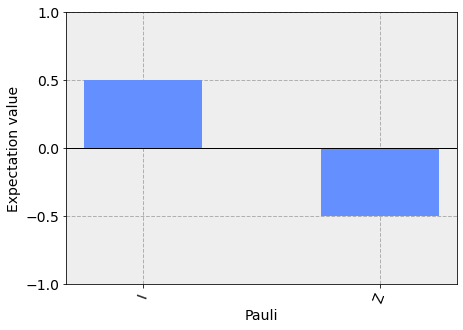

In [54]:
# circuit 1 after measurement is |1>, therefore the hinton
plot_state_paulivec(result1.get_statevector())

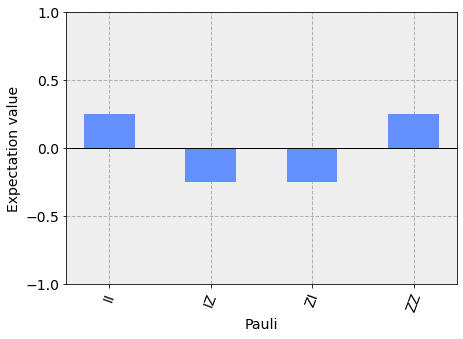

In [55]:
# circuit 2's hinton after measurement
plot_state_paulivec(result2.get_statevector())

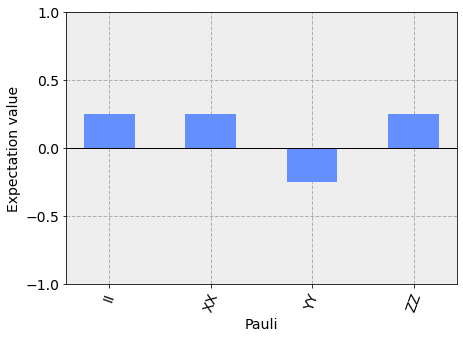

In [56]:
# circuit 2's hinton before measurement
output = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
plot_state_paulivec(output)

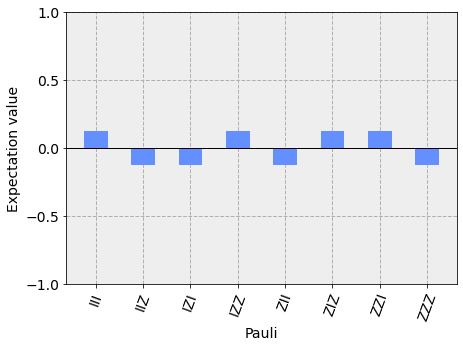

In [57]:
# circuit 3's hinton after measurement
plot_state_paulivec(result3.get_statevector())

[More visualizations](https://qiskit.org/documentation/apidoc/visualization.html)